In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("SpotifyFeatures.csv")

In [3]:
data.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,232725.0,41.127502,18.189948,0.00000,29.0000,43.000000,55.0000,100.000
acousticness,232725.0,0.368560,0.354768,0.00000,0.0376,0.232000,0.7220,0.996
danceability,232725.0,0.554364,0.185608,0.05690,0.4350,0.571000,0.6920,0.989
duration_ms,232725.0,235122.339306,118935.909299,15387.00000,182857.0000,220427.000000,265768.0000,5552917.000
energy,232725.0,0.570958,0.263456,0.00002,0.3850,0.605000,0.7870,0.999
instrumentalness,232725.0,0.148301,0.302768,0.00000,0.0000,0.000044,0.0358,0.999
liveness,232725.0,0.215009,0.198273,0.00967,0.0974,0.128000,0.2640,1.000
loudness,232725.0,-9.569885,5.998204,-52.45700,-11.7710,-7.762000,-5.5010,3.744
speechiness,232725.0,0.120765,0.185518,0.02220,0.0367,0.050100,0.1050,0.967
tempo,232725.0,117.666585,30.898907,30.37900,92.9590,115.778000,139.0540,242.903


In [9]:
abc = data['artist_name'].unique()

In [10]:
df2['genre'].unique()

array(['Dance', 'Electronic', 'Hip-Hop', 'Rap', 'Indie', 'Pop',
       'Reggaeton', 'R&B', 'Rock'], dtype=object)

In [11]:
df2.shape

(130, 13)

In [12]:
#check null values
print(data.isnull().sum(axis = 0))

genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
dtype: int64


C:\Users\Swapnil Kadakia\AppData\Local\Temp/ipykernel_31052/27862156.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('genre', 1)
C:\Users\Swapnil Kadakia\AppData\Local\Temp/ipykernel_31052/27862156.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('track_name', 1)
C:\Users\Swapnil Kadakia\AppData\Local\Temp/ipykernel_31052/27862156.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('artist_name' , 1)


acousticness : 0.085897
danceability : 0.128292
duration_ms : 0.079025
energy : 0.144598
instrumentalness : 0.029626
liveness : 0.240817
loudness : 0.144691
speechiness : 0.078967
tempo : 0.068087


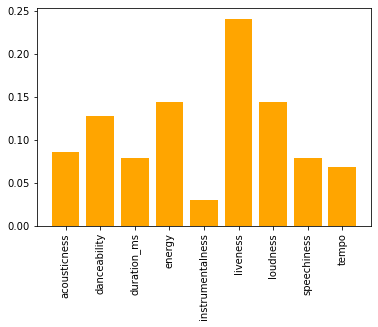

In [17]:
#running ML for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 

df = data

#removing the unnecessary data
df = df.drop('genre', 1)
df = df.drop('track_name', 1)
df = df.drop('artist_name' , 1)


Y = df["popularity"]  
X = df.iloc[:, 1:]
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, Y)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i in range(len(importance)):
    print(X.columns[i] + " : "+ str(importance[i].round(6)))
    
# plot feature importance
plt.xticks(rotation=90)
plt.bar([x for x in X.columns], importance, color = 'orange')

plt.show()